# Table of contents
1. [Import Data and Libraries](#Import)
2. [EDA](#EDA)
3. [Model Training](#Model)


# Import Data and Libraries<a name="Import"></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# print all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Ref - https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_train.csv

In [3]:
# import data
df = pd.read_csv("aug_train.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


#### Features
- enrollee_id : Unique ID for candidate
- city: City code
- city_ development _index : Developement index of the city (scaled)
- gender: Gender of candidate
- relevent_experience: Relevant experience of candidate
- enrolled_university: Type of University course enrolled if any
- education_level: Education level of candidate
- major_discipline :Education major discipline of candidate
- experience: Candidate total experience in years
- company_size: No of employees in current employer's company
- company_type : Type of current employer
- lastnewjob: Difference in years between previous job and current job
- training_hours: training hours completed
- target: 0 – Not looking for job change, 1 – Looking for a job change

# EDA<a name="EDA"></a>

In [4]:
df.shape

(19158, 14)

In [5]:
df.describe(include='all')

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,19158.000000,19158,19158.000000,14650,19158,18772,18698,16345,19093,13220,13018,18735,19158.000000,19158.000000
unique,NaN,123,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,NaN,4355,NaN,13221,13792,13817,11598,14492,3286,3083,9817,8040,NaN,NaN
mean,16875.358179,NaN,0.828848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.366896,0.249348
std,9616.292592,NaN,0.123362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.058462,0.432647
min,1.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,8554.250000,NaN,0.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,16982.500000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,25169.750000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,0.000000


In [6]:
# drop unnecessary columns
df.drop(['enrollee_id', 'city'], axis = 1, inplace=True)
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## Investigating Categorical Variables

### `gender`

In [7]:
# value_counts
df['gender'].value_counts(dropna = False)

Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64

Since `number of females << number of males`, we will convert this into a binary feature - **`Male_Yes`** and **`Male_No`**` and binarize them to 1 and 0, respectively

In [8]:
df['gender'] = df['gender'].map(lambda x : 1 if x == 'Male' else 0)
df['gender'].value_counts(dropna = False)

1    13221
0     5937
Name: gender, dtype: int64

### `relevant_experience`

In [9]:
# value_counts
df['relevent_experience'].value_counts(dropna = False)

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [10]:
# minimiozing values for relevent_experience
df['relevent_experience'] = df['relevent_experience'].map(lambda x : 1 if x == 'Has relevent experience' else 0)
df['relevent_experience'].value_counts(dropna = False)

1    13792
0     5366
Name: relevent_experience, dtype: int64

### Academics - `enrolled_university`, `education_level`, `major_discipline`

In [11]:
df.isna().sum()

city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [12]:
# value_counts
df['enrolled_university'].value_counts(dropna = False)

no_enrollment       13817
Full time course     3757
Part time course     1198
NaN                   386
Name: enrolled_university, dtype: int64

In [13]:
df['education_level'].value_counts(dropna = False)

Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [14]:
df['major_discipline'].value_counts(dropna = False)

STEM               14492
NaN                 2813
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

- Let's check distribution of values when one of the three variables is NULL

In [15]:
for i in ['enrolled_university', 'education_level', 'major_discipline']:
    for j in ['enrolled_university', 'education_level', 'major_discipline']:
        if i != j:
            print("when %s is null" % (i))
            print(df.loc[df[i].isna(), j].value_counts(dropna = False))
            print()
        else:
            continue

when enrolled_university is null
Graduate          171
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

when enrolled_university is null
STEM               208
NaN                157
Humanities           9
No Major             4
Other                4
Business Degree      2
Arts                 2
Name: major_discipline, dtype: int64

when education_level is null
no_enrollment       270
NaN                 100
Full time course     69
Part time course     21
Name: enrolled_university, dtype: int64

when education_level is null
NaN    460
Name: major_discipline, dtype: int64

when major_discipline is null
no_enrollment       1481
Full time course     976
Part time course     199
NaN                  157
Name: enrolled_university, dtype: int64

when major_discipline is null
High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: 

when `enrolled_university` is NULL, `education_level` -


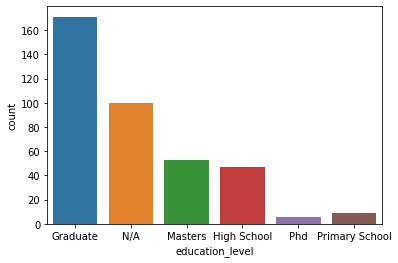


when `enrolled_university` is NULL, `major_discipline` -


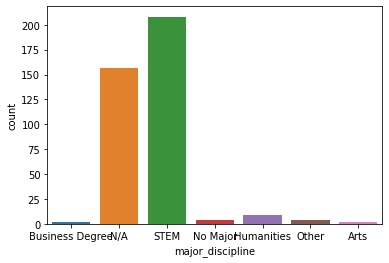


when `education_level` is NULL, `enrolled_university` -


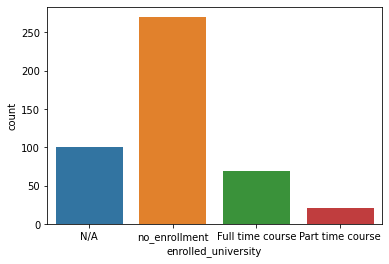


when `education_level` is NULL, `major_discipline` -


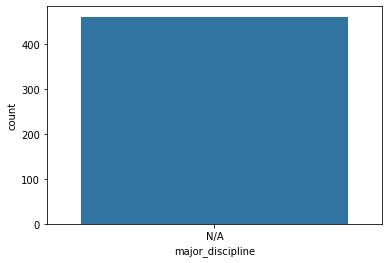


when `major_discipline` is NULL, `enrolled_university` -


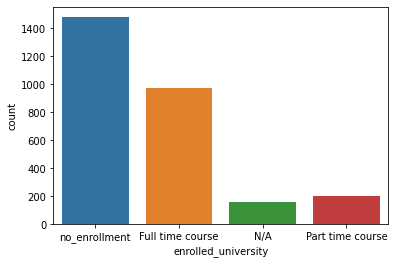


when `major_discipline` is NULL, `education_level` -


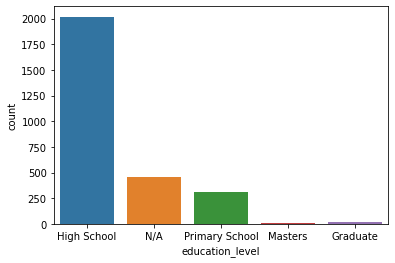

In [16]:
for i in ['enrolled_university', 'education_level', 'major_discipline']:
    for j in ['enrolled_university', 'education_level', 'major_discipline']:
        if i != j:
            print("when `%s` is NULL, `%s` -" % (i, j))
            sns.countplot(df.loc[df[i].isna(), j].fillna("N/A"))
            plt.show()
            print()
        else:
            continue

In [17]:
pd.crosstab(df['education_level'].fillna("N/A"), df['enrolled_university'].fillna("N/A"))

enrolled_university,Full time course,N/A,Part time course,no_enrollment
education_level,,,,
Graduate,2209,171,784,8434
High School,864,47,166,940
Masters,557,53,204,3547
N/A,69,100,21,270
Phd,25,6,12,371
Primary School,33,9,11,255


#### Observations - 
1. ***`enrolled_university`*** -  
- Majority of NULLS have **`education_level` == *graduation or higher*** , so we can assume that they did not enroll to any university course. Remaining values can be assumed as "not enrolled" too.  
- To further solidify our assumption, we will take a look at the crosstab above as well. We observe that `education_level` == NULL has maximum values against `enrolled_university` = "no enrollment". While, for `enrolled_university` == NULL has maximum values in `education_level` = "Graduate".

2. ***`education_level`*** - We plan to make this variable have 3 categories - "High School or Lower", "Graduation" and "Post Graduation". We can then club NULLS with "High School or Lower" category since their `major_discipline` is also NULL (heavy majority of the cases where `major_discipline` is NULL have `education_level` up to High School only). 

3. ***`major_discipline`*** - We plan to make this a binary variable - "STEM" and "Non-STEM". Now, heavy majority of the cases where Major Discipline is NULL have education up to High School only. So, we will simply put NULLS into "Non-STEM" category.

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

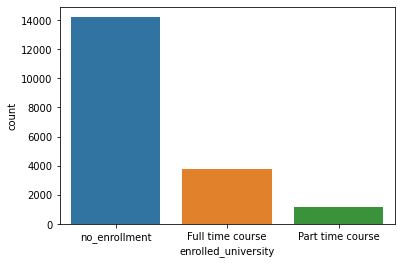

In [18]:
# enrolled_university
df['enrolled_university'] = df['enrolled_university'].fillna("no_enrollment")
sns.countplot(df['enrolled_university'])

- The variable `enrolled_university` is also extremely skewed which is why we will merge "Full Time" and "Part Time" into one category i.e. **enrolled**.
- We will also binarize the variable into 1 and 0 meaning "Enrolled" and "Not Enrolled" respectively.

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

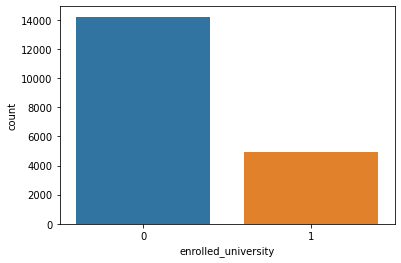

In [19]:
df['enrolled_university'] = df['enrolled_university'].map(lambda x : 0 if x == "no_enrollment" else 1)
sns.countplot(df['enrolled_university'])

In [20]:
# education_level
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [21]:
def education(x):
    if x in ['Masters', 'Phd']:
        return 2
        # "Post Graduate"
    elif x == "Graduate":
        return 1
        # "Graduate"
    else:
        return 0 
        # "Non-Graduate"

<AxesSubplot:xlabel='education_level', ylabel='count'>

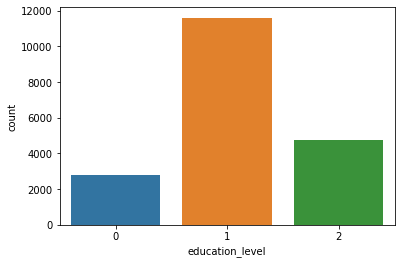

In [22]:
df['education_level'] = df['education_level'].map(education)
sns.countplot(df['education_level'])

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

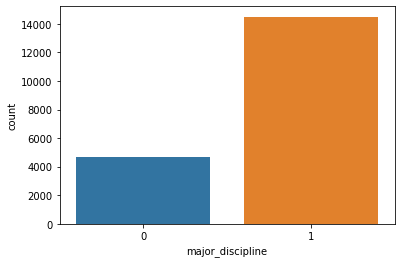

In [23]:
# major_discipline
df['major_discipline'] = df['major_discipline'].map(lambda x : 1 if x == "STEM" else 0)
sns.countplot(df['major_discipline'])

### `experience`

In [24]:
# value_counts
df['experience'].value_counts(dropna = False)

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
NaN      65
Name: experience, dtype: int64

#### Observations - 
1. NULLS - There are only 65 NULLS, we can equate them to 0 because this is the information which companies usually have or we can simply remove the rows. We will do the former.
2. We can probably use this as a categorical variable by using ranges of experience, which is also commonly seen in job requirements. We can use the below groups - 
        - 0 to 2
        - 3 to 6
        - 7 to 10
        - 10 to 20
        - 20 and above

In [25]:
def experience_groups(x):
    if (x in [np.nan, '1', '2']):
        return 0 
        # "0 to 2"
    elif x in ['3', '4', '5', '6']:
        return 1
        # "3 to 6"
    elif x in ['7', '8', '9', '10']:
        return 2
        # "7 to 10"
    elif x == ">20":
        return 3
        # "20+"
    else:
        return 4
        # "10 to 20"

In [26]:
df['experience'] = df['experience'].map(experience_groups)
df['experience'].value_counts(dropna = False)

1    5403
4    4933
2    3795
3    3286
0    1741
Name: experience, dtype: int64

###  `last_new_job`

In [27]:
# value_counts
df['last_new_job'].value_counts(dropna = False)

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
NaN       423
Name: last_new_job, dtype: int64

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

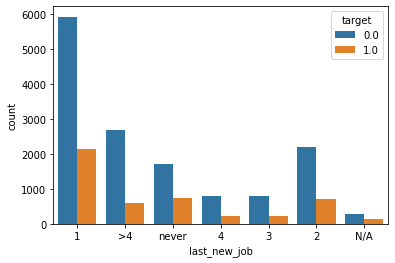

In [28]:
sns.countplot(df['last_new_job'].fillna("N/A"), hue = df['target'])

- There are 423 NULLs in this variable and these can be equated to "never" since this is the information the company usually has.
- Based on the frequency distribution above, we can create the below groups - 
        - "1"
        - "2 or more"
        - "never"

In [29]:
def last_job_groups(x):
    if x in [np.nan, 'never']:
        return 0 
        # "never"
    elif x == "1":
        return 1
    else:
        return 2 
        # "2 or more"

In [30]:
df['last_new_job'] = df['last_new_job'].map(last_job_groups)
df['last_new_job'].value_counts(dropna = False)

2    8243
1    8040
0    2875
Name: last_new_job, dtype: int64

In [31]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,1,1,0,1,1,3,NaN,NaN,1,36,1.0
1,0.776,1,0,0,1,1,4,50-99,Pvt Ltd,2,47,0.0
2,0.624,0,0,1,1,1,1,NaN,NaN,0,83,0.0
3,0.789,0,0,0,1,0,4,NaN,Pvt Ltd,0,52,1.0
4,0.767,1,1,0,2,1,3,50-99,Funded Startup,2,8,0.0


### `company_size` and `company_type`

In [32]:
# value_counts
df['company_size'].value_counts(dropna = False, normalize = True)

NaN          0.309949
50-99        0.160925
100-500      0.134200
10000+       0.105387
10/49        0.076783
1000-4999    0.069318
<10          0.068274
500-999      0.045777
5000-9999    0.029387
Name: company_size, dtype: float64

In [33]:
# value_counts
df['company_type'].value_counts(dropna = False, normalize = True)

Pvt Ltd                0.512423
NaN                    0.320493
Funded Startup         0.052250
Public Sector          0.049849
Early Stage Startup    0.031475
NGO                    0.027195
Other                  0.006316
Name: company_type, dtype: float64

- Over 30% of data is missing for both the variables, so we will drop these features.

In [34]:
df.drop(['company_size', 'company_type'], axis = 1, inplace=True)

In [35]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
0,0.920,1,1,0,1,1,3,1,36,1.0
1,0.776,1,0,0,1,1,4,2,47,0.0
2,0.624,0,0,1,1,1,1,0,83,0.0
3,0.789,0,0,0,1,0,4,0,52,1.0
4,0.767,1,1,0,2,1,3,2,8,0.0


## Investigating Numerical Variables

In [36]:
# function to get normality plots
def prob_plots(x):
    from scipy.stats import probplot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))

    res = probplot(x, plot = ax[0])
    ax[0].set_title("Q-Q Plot")

    ax[1] = sns.kdeplot(x, fill = True, ax = ax[1])
    ax[1].set_title("KDE (PDF) Plot")

    ax[2] = sns.ecdfplot(x, ax = ax[2])
    ax[2].set_title("KDE (PDF) Plot")

### `city_development_index`

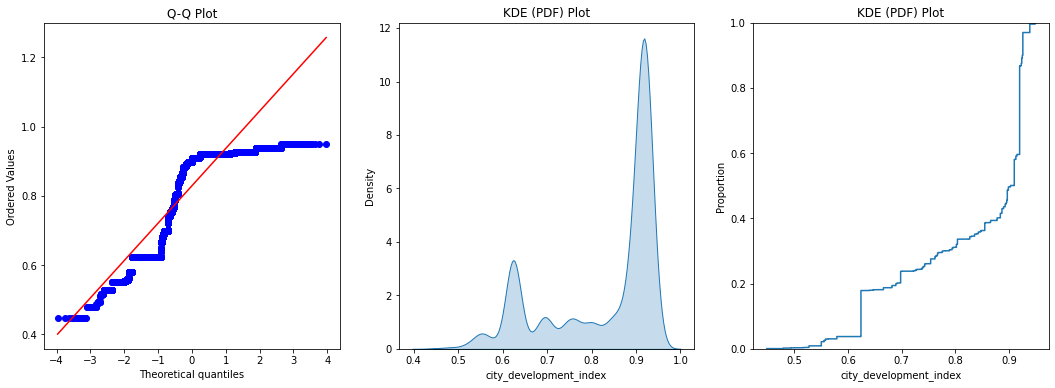

In [37]:
prob_plots(df['city_development_index'])

<AxesSubplot:xlabel='target', ylabel='city_development_index'>

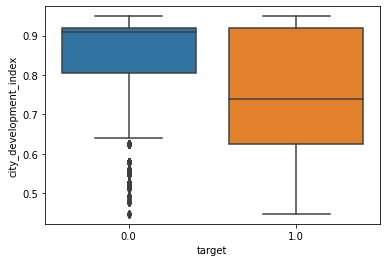

In [38]:
sns.boxplot(y = df['city_development_index'], x = df['target'])

- It seems that a higher median `city_development_index` relates to employees being more probable to stay in their current jobs.
- We will keep the variable as is for now.

<AxesSubplot:ylabel='city_development_index'>

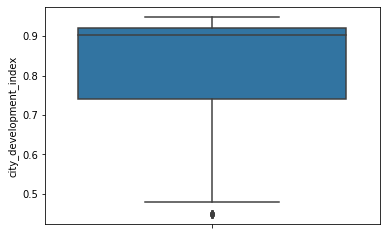

In [39]:
# check for outliers
sns.boxplot(y = df['city_development_index'])

### `training_hours`

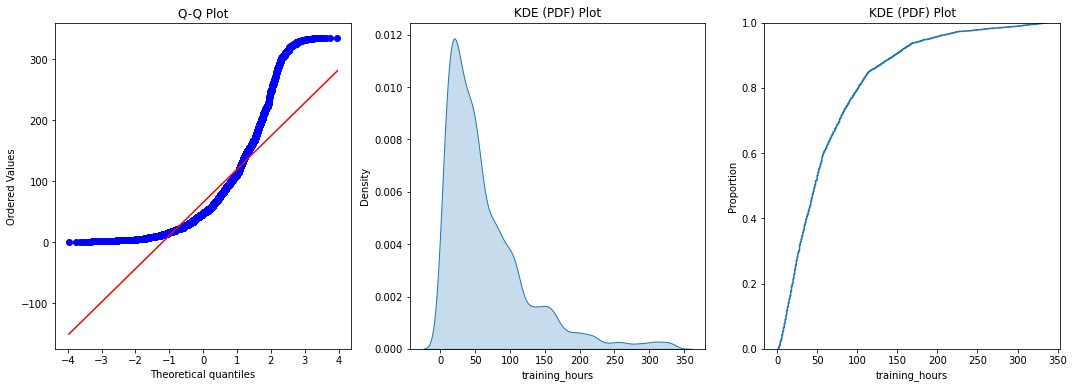

In [40]:
prob_plots(df['training_hours'])

<AxesSubplot:xlabel='target', ylabel='training_hours'>

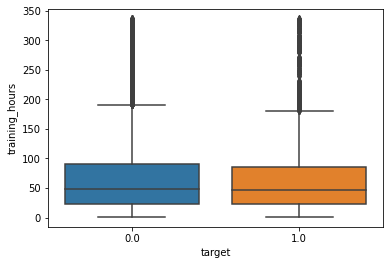

In [41]:
sns.boxplot(y = df['training_hours'], x = df['target'])

- It seems the feature has too many outliers, or rather extreme values, in it. Hence, we will try applying a log transformation to see if that effect is reduced. 

<AxesSubplot:xlabel='target', ylabel='training_hours'>

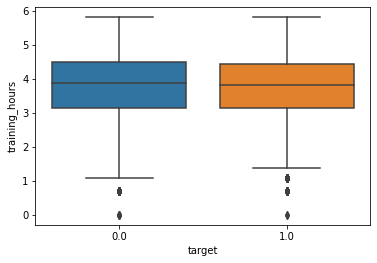

In [42]:
# check for outliers
sns.boxplot(y = np.log(df['training_hours']), x = df['target'])

- This looks much better. We will move ahead with the transformation.

In [43]:
df['log_training_hours'] = np.log(df['training_hours'])
df.drop('training_hours', axis = 1, inplace = True)
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,target,log_training_hours
0,0.920,1,1,0,1,1,3,1,1.0,3.583519
1,0.776,1,0,0,1,1,4,2,0.0,3.850148
2,0.624,0,0,1,1,1,1,0,0.0,4.418841
3,0.789,0,0,0,1,0,4,0,1.0,3.951244
4,0.767,1,1,0,2,1,3,2,0.0,2.079442


## Check for multicollinearity between two numeric variables.

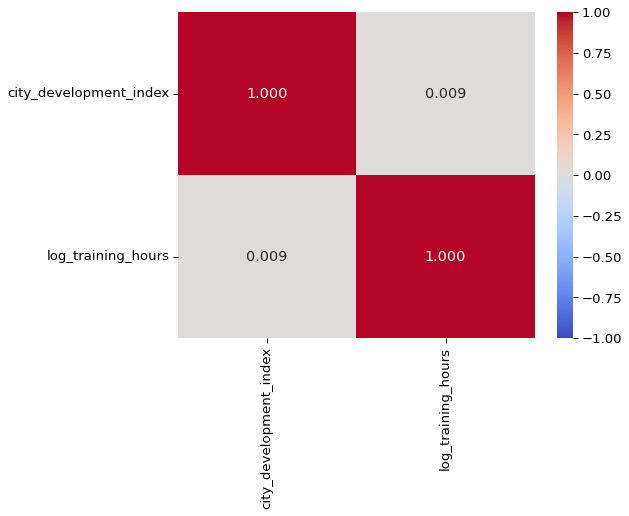

In [44]:
# correlation plot
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)

corr = df[["city_development_index", "log_training_hours"]].corr()

hm = sns.heatmap(corr, cmap="coolwarm", annot=True, vmin = -1, vmax = 1, fmt='.3f')
hm.set_xticklabels(labels=corr.columns.values, rotation=90)
hm.set_yticklabels(labels=corr.columns.values, rotation=0);

# Model Training<a name="Model"></a>

### Data Preparation for sklearn

In [45]:
# train test split
from sklearn.model_selection import train_test_split

X = df.drop('target', axis = 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train =', X_train.shape)
print('X_test =', X_test.shape)
print('y_train =', y_train.shape)
print('y_test =', y_test.shape)

X_train = (13410, 9)
X_test = (5748, 9)
y_train = (13410,)
y_test = (5748,)


## 1. Decision Trees

In [45]:
# build tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 42).fit(X_train, y_train)

In [46]:
# check score on training set
clf.score(X_train, y_train)

0.9803877703206563

In [47]:
# check score on testing set
clf.score(X_test, y_test)

0.6833681280445373

We can see that the model has overfit. We will now try to regularize this Decision Tree to eliminate overfitting.

In [48]:
from sklearn.model_selection import RandomizedSearchCV

cv_parameters = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20, 30, 40],
              "max_depth": [2, 5, 10, 15, 25],
              "min_samples_leaf": [1, 5, 10, 15, 20],
              "max_leaf_nodes": [5, 10, 20, 30, 40],
              }

dt_classifier = RandomizedSearchCV(estimator=tree.DecisionTreeClassifier(random_state = 42), 
                                   param_distributions=cv_parameters,
                                   cv = 5,
                                   scoring = 'accuracy',
                                   return_train_score = 'True',
                                   n_iter=100,
                                   random_state=42
                                  )
dt_classifier.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 5, 10, 15, 25],
                                        'max_leaf_nodes': [5, 10, 20, 30, 40],
                                        'min_samples_leaf': [1, 5, 10, 15, 20],
                                        'min_samples_split': [2, 10, 20, 30,
                                                              40]},
                   random_state=42, return_train_score='True',
                   scoring='accuracy')

In [49]:
dt_classifier.best_score_

0.7868754660700968

In [50]:
cv_results = pd.DataFrame(dt_classifier.cv_results_).dropna()
cv_results = cv_results.iloc[:, [4,5,6,7,8,15,23,16,24]]
cv_results.sort_values(by = 'mean_test_score', ascending = False).head()

,param_min_samples_split,param_min_samples_leaf,param_max_leaf_nodes,param_max_depth,param_criterion,mean_test_score,mean_train_score,std_test_score,std_train_score
50,2,10,5,5,entropy,0.786875,0.786875,0.005427,0.001357
33,2,20,10,5,gini,0.786875,0.786875,0.005427,0.001357
23,30,1,10,5,entropy,0.786875,0.786875,0.005427,0.001357
24,2,20,5,10,gini,0.786875,0.786875,0.005427,0.001357
68,30,5,10,25,entropy,0.786875,0.786875,0.005427,0.001357


- Earlier, we had a training score of 0.98 and testing score of 0.68. The model has obviously overfit and after applying Regularization with Cross Validation, we see that the training score and the testing score are both now a modest 0.78. 

Let's take a look at how the best tree is built.

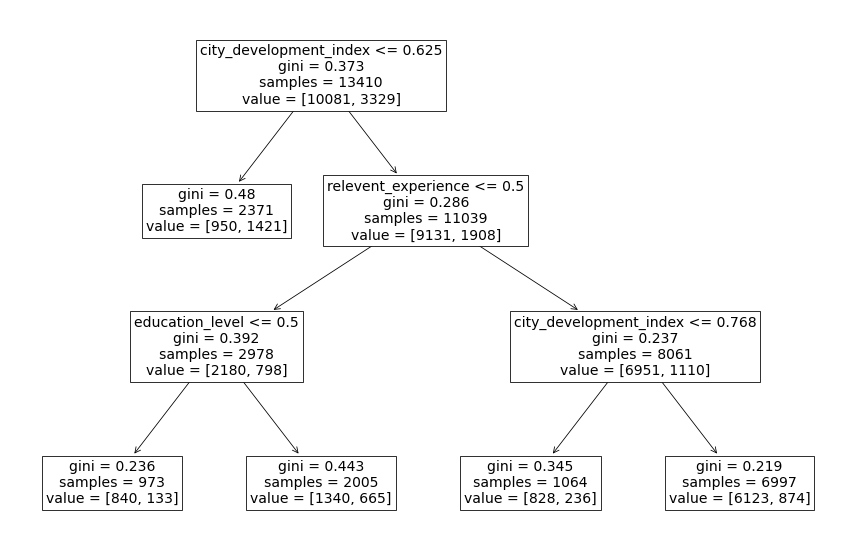

In [51]:
# visualizing tree
_, ax = plt.subplots(figsize=(15,10)) # Resize figure
tree.plot_tree(dt_classifier.best_estimator_, feature_names=X_train.columns, fontsize=14)
plt.show()

- We will now try to see if this can be improved upon by using [Cost Complexity Pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py) using original Decision Tree which had overfit - 

Basic Concept - 
- The `cost_complexity_pruning_path()` function of the `DecisionTreeClassifier()` provides a list of Alpha values, `ccp_alpha`, for each pruned tree at the weakest link (one that least minimizes or does not minimize the misclassificaiton rate from parent to leaf node).
- When &#945; $= 0$, the tree is unpruned and as &#945; &#8594; &#8734;, the tree size $T$ &#8594; $1$. 
- We then plot the traning v/s testing set accuracies for each `ccp_alpha` and see how the accuracy changes with each value. We can then use cross validation around a set of values where training and testing accuracy are good as well as close enough to check which one gives us the best performance.

In [52]:
clf = tree.DecisionTreeClassifier(random_state = 42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

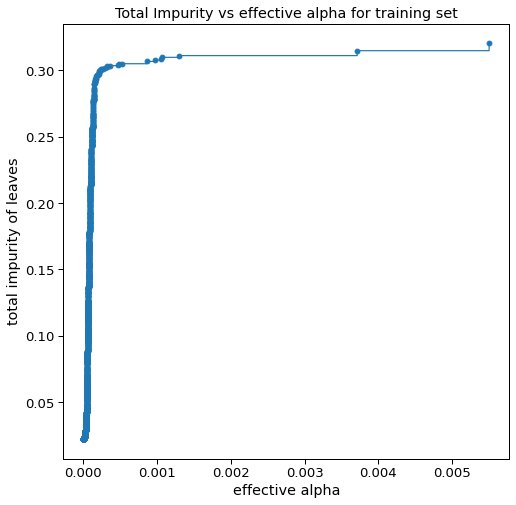

In [53]:
fig, ax = plt.subplots(figsize = (8,8))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [54]:
clfs = []
ccp_alphas = ccp_alphas[ccp_alphas>=0]
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05294659854356043


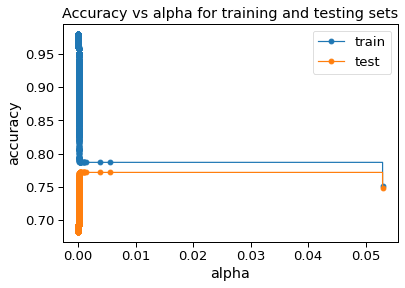

In [55]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


- Using Cost Complexity pruninig as well, we see that the accuracy is not improved significantly. We will move ahead with Ensemble Learning now.

## 2. Random Forests - Bagging

We will first fit a default Random Forest and then use CV (Randomized Search).

In [56]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=42, oob_score = True)

clf_rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [57]:
clf_rf.score(X_train, y_train)

0.9803877703206563

In [58]:
clf_rf.score(X_test, y_test)

0.7336464857341684

- As we can see, the model seems to be overfitting. This is because we have not applied any hyperparameter tuninig. 
- We will now try hyperparameter tuninig and see if we get any improvement. 
- First, let's check how OOB error drops with increase in trees.

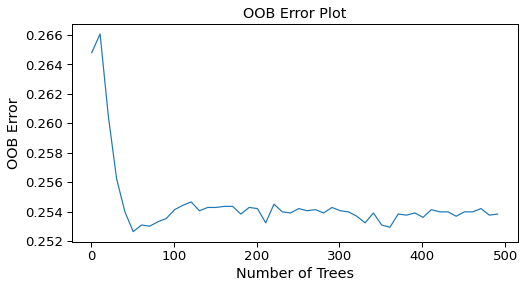

In [59]:
# check oob error
n_estimators = 500

oob_errors = []

for i in range(1, n_estimators + 1, 10):
    clf_rf.set_params(n_estimators=i)
    clf_rf.fit(X_train, y_train)
    oob_errors.append([i, 1 - clf_rf.oob_score_])

xs, ys = zip(*oob_errors)  # * to unpack by 1 dim

plt.figure(figsize=(8,4))
sns.lineplot(x = xs, y = ys)
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error")
plt.title("OOB Error Plot")
plt.show()

- Even for 500 trees, we are not getting any significant improvement. 
- Let's try some other stuff.

In [60]:
from sklearn.model_selection import GridSearchCV

params = {'max_features': ['auto', 'sqrt', 'log2'],
          'n_estimators': [200, 400, 600]
         }

clf_rf_cv = GridSearchCV(estimator = RandomForestClassifier(random_state = 42),
                         param_grid = params,
                         cv = 3,
                         return_train_score = True,
                         scoring = 'accuracy'
                        )

clf_rf_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 400, 600]},
             return_train_score=True, scoring='accuracy')

In [61]:
clf_rf_cv.best_score_

0.7449664429530202

In [62]:
clf_rf_cv.score(X_train, y_train)

0.9803877703206563

In [63]:
clf_rf_cv.score(X_test, y_test)

0.7360821155184412

- It seems that tuninig hyperparameters has not solved the issue of overfitting using Random Forests either. Let's check the feature importance chart nonetheless.

In [64]:
clf_rf_cv.best_estimator_.feature_importances_

array([0.30172669, 0.02641152, 0.02290648, 0.02071453, 0.0339138 ,
       0.0188256 , 0.0696447 , 0.04391115, 0.46194553])

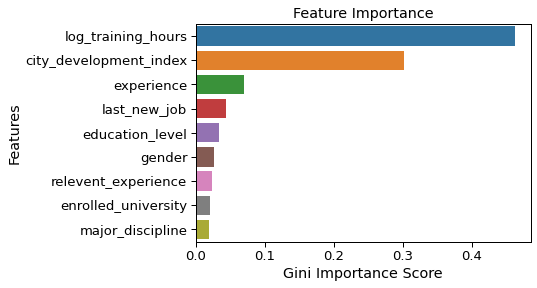

In [65]:
feature_scores = pd.Series(clf_rf_cv.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Gini Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.show()

- Let's try and build a Random Forest usiong the two important features.

In [66]:
feature_scores.index[:2]

Index(['log_training_hours', 'city_development_index'], dtype='object')

In [67]:
clf_rf = RandomForestClassifier(random_state=42, oob_score = True)
clf_rf.fit(X_train[feature_scores.index[:2]], y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [68]:
clf_rf.score(X_train[feature_scores.index[:2]], y_train)

0.839821029082774

In [69]:
clf_rf.score(X_test[feature_scores.index[:2]], y_test)

0.7413013221990258

- A little improvement but still negligible. Let's try some boosting methods now.

## 3. AdaBoost

In [103]:
from sklearn.ensemble import AdaBoostClassifier

clf_adaBoost = AdaBoostClassifier(random_state=42)

clf_adaBoost.fit(X_train, y_train)

# if you use base_estimator = DecisionTreeClassifier(), AdaBoost will grow the trees to it's fullest (default DT settings); 
# so unless using a specific DT, use base_estimator = None

AdaBoostClassifier(random_state=42)

In [104]:
clf_adaBoost.score(X_train, y_train)

0.784041759880686

In [105]:
clf_adaBoost.score(X_test, y_test)

0.7694850382741824

In [106]:
clf_adaBoost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

In [74]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [50, 100, 200, 400, 600],
          'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 1.5, 2]
         }

clf_adaBoost_cv = GridSearchCV(estimator = AdaBoostClassifier(random_state=42),
                               param_grid = params,
                               cv = 3,
                               return_train_score = True,
                               scoring = 'accuracy',
                               verbose = 2
                              )

clf_adaBoost_cv.fit(X_train, y_train)

Fitting 3 folds for each of 35 candidates, totalling 105 fits
[CV] END ..............learning_rate=0.0001, n_estimators=50; total time=   0.2s
[CV] END ..............learning_rate=0.0001, n_estimators=50; total time=   0.2s
[CV] END ..............learning_rate=0.0001, n_estimators=50; total time=   0.2s
[CV] END .............learning_rate=0.0001, n_estimators=100; total time=   0.5s
[CV] END .............learning_rate=0.0001, n_estimators=100; total time=   0.5s
[CV] END .............learning_rate=0.0001, n_estimators=100; total time=   0.4s
[CV] END .............learning_rate=0.0001, n_estimators=200; total time=   0.9s
[CV] END .............learning_rate=0.0001, n_estimators=200; total time=   0.9s
[CV] END .............learning_rate=0.0001, n_estimators=200; total time=   1.0s
[CV] END .............learning_rate=0.0001, n_estimators=400; total time=   2.0s
[CV] END .............learning_rate=0.0001, n_estimators=400; total time=   2.0s
[CV] END .............learning_rate=0.0001, n_e

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 1.5, 2],
                         'n_estimators': [50, 100, 200, 400, 600]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [75]:
clf_adaBoost_cv.best_score_

0.786875466070097

In [76]:
clf_adaBoost_cv.score(X_train, y_train)

0.786875466070097

In [77]:
clf_adaBoost_cv.score(X_test, y_test)

0.7717466945024356

In [99]:
clf_adaBoost_cv.best_estimator_.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.0001,
 'n_estimators': 50,
 'random_state': 42}

- AdaBoost is giving us a traing and test accuracy of ~78%. While not great, at least our model is not overfitting.

## 4. Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_clf = GradientBoostingClassifier(random_state=42)
gbm_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [49]:
gbm_clf.score(X_train, y_train)

0.7903057419835944

In [50]:
gbm_clf.score(X_test, y_test)

0.7726165622825331

In [51]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [50, 100, 200, 400, 600],
          'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
          'subsample' : [0.5, 0.75]
         }

clf_gbm_cv = GridSearchCV(estimator = GradientBoostingClassifier(random_state=42),
                               param_grid = params,
                               cv = 3,
                               return_train_score = True,
                               scoring = 'accuracy',
                               verbose = 2
                              )

clf_gbm_cv.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END learning_rate=0.0001, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.0001, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.0001, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.0001, n_estimators=50, subsample=0.75; total time=   0.2s
[CV] END learning_rate=0.0001, n_estimators=50, subsample=0.75; total time=   0.2s
[CV] END learning_rate=0.0001, n_estimators=50, subsample=0.75; total time=   0.2s
[CV] END learning_rate=0.0001, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.0001, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.0001, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.0001, n_estimators=100, subsample=0.75; total time=   0.4s
[CV] END learning_rate=0.0001, n_estimators=100, subsample=0.75; total time=   0.4s
[CV] END learning_rate=0.0

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200, 400, 600],
                         'subsample': [0.5, 0.75]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [54]:
clf_gbm_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=400,
                           random_state=42, subsample=0.5)

In [55]:
clf_gbm_cv.best_score_

0.7859060402684565

In [52]:
clf_gbm_cv.score(X_train, y_train)

0.7879194630872484

In [53]:
clf_gbm_cv.score(X_test, y_test)

0.7705288796102993

## 5. XGBoost

In [51]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(random_state = 42, eval_metric = 'logloss')
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
clf_xgb.score(X_train, y_train)

0.8413870246085011

In [53]:
clf_xgb.score(X_test, y_test)

0.7627000695894224

- We get a decent model with XGBoost as well. Let's see if we can better this with CV and some hyperparameter tuning.
- We will now do a multistep CV tuning the individual learner hyperparameters first and then the model hyperparameters.

In [55]:
from sklearn.model_selection import GridSearchCV

param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

clf_xgb_cv = GridSearchCV(estimator = XGBClassifier(random_state = 42, eval_metric = 'logloss'),
                               param_grid = param_test1,
                               cv = 3,
                               return_train_score = True,
                               scoring = 'accuracy',
                               verbose = 2
                              )

clf_xgb_cv.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ....................max_depth=3, min_child_weight=1; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=1; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=1; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=3; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=3; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=3; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=5; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=5; total time=   0.1s
[CV] END ....................max_depth=3, min_child_weight=5; total time=   0.1s
[CV] END ....................max_depth=5, min_child_weight=1; total time=   0.2s
[CV] END ....................max_depth=5, min_child_weight=1; total time=   0.2s
[CV] END ....................max_depth=5, min_ch

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, mono...constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
              

In [56]:
clf_xgb_cv.best_score_

0.7782252050708426

In [57]:
clf_xgb_cv.best_params_

{'max_depth': 3, 'min_child_weight': 3}

In [62]:
param_test1 = {
    'min_child_weight' : [6,8,10,12],
    'gamma' : [0.0, 0.1, 0.2, 0.3, 0.4]
}

clf_xgb_cv = GridSearchCV(estimator = XGBClassifier(random_state = 42, eval_metric = 'logloss',
                                                    max_depth = 3, min_child_weight = 3
                                                   ),
                               param_grid = param_test1,
                               cv = 3,
                               return_train_score = True,
                               scoring = 'accuracy',
                               verbose = 2
                              )

clf_xgb_cv.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ......................gamma=0.0, min_child_weight=6; total time=   0.1s
[CV] END ......................gamma=0.0, min_child_weight=6; total time=   0.1s
[CV] END ......................gamma=0.0, min_child_weight=6; total time=   0.1s
[CV] END ......................gamma=0.0, min_child_weight=8; total time=   0.1s
[CV] END ......................gamma=0.0, min_child_weight=8; total time=   0.1s
[CV] END ......................gamma=0.0, min_child_weight=8; total time=   0.1s
[CV] END .....................gamma=0.0, min_child_weight=10; total time=   0.1s
[CV] END .....................gamma=0.0, min_child_weight=10; total time=   0.1s
[CV] END .....................gamma=0.0, min_child_weight=10; total time=   0.1s
[CV] END .....................gamma=0.0, min_child_weight=12; total time=   0.1s
[CV] END .....................gamma=0.0, min_child_weight=12; total time=   0.1s
[CV] END .....................gamma=0.0, min_chi

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=3, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                  

In [63]:
clf_xgb_cv.best_score_

0.7809843400447427

In [64]:
clf_xgb_cv.best_params_

{'gamma': 0.4, 'min_child_weight': 8}

In [69]:
param_test1 = {
    'subsample':[0.5, 0.75, 1],
    'colsample_bytree':[0.5, 0.75, 1]
}

clf_xgb_cv = GridSearchCV(estimator = XGBClassifier(random_state = 42, eval_metric = 'logloss',
                                                    max_depth = 3, min_child_weight = 8, 
                                                    gamma = 0.4
                                                   ),
                               param_grid = param_test1,
                               cv = 3,
                               return_train_score = True,
                               scoring = 'accuracy',
                               verbose = 2
                              )

clf_xgb_cv.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ................colsample_bytree=0.5, subsample=0.5; total time=   0.2s
[CV] END ................colsample_bytree=0.5, subsample=0.5; total time=   0.1s
[CV] END ................colsample_bytree=0.5, subsample=0.5; total time=   0.1s
[CV] END ...............colsample_bytree=0.5, subsample=0.75; total time=   0.1s
[CV] END ...............colsample_bytree=0.5, subsample=0.75; total time=   0.2s
[CV] END ...............colsample_bytree=0.5, subsample=0.75; total time=   0.1s
[CV] END ..................colsample_bytree=0.5, subsample=1; total time=   0.1s
[CV] END ..................colsample_bytree=0.5, subsample=1; total time=   0.1s
[CV] END ..................colsample_bytree=0.5, subsample=1; total time=   0.1s
[CV] END ...............colsample_bytree=0.75, subsample=0.5; total time=   0.2s
[CV] END ...............colsample_bytree=0.75, subsample=0.5; total time=   0.2s
[CV] END ...............colsample_bytree=0.75, su

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=0.4,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=3, min_child_weight=8,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                   

In [70]:
clf_xgb_cv.best_score_

0.7809843400447427

In [71]:
clf_xgb_cv.best_params_

{'colsample_bytree': 1, 'subsample': 1}

In [72]:
param_test1 = {
    'reg_alpha' : [1e-5, 1e-2, 0.1, 1, 100, 0],
    'reg_lambda' : [1e-5, 1e-2, 0.1, 1, 100, 0],
}

clf_xgb_cv = GridSearchCV(estimator = XGBClassifier(random_state = 42, eval_metric = 'logloss',
                                                    max_depth = 3, min_child_weight = 8, 
                                                    gamma = 0.4
                                                   ),
                               param_grid = param_test1,
                               cv = 3,
                               return_train_score = True,
                               scoring = 'accuracy',
                               verbose = 2
                              )

clf_xgb_cv.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END ..................reg_alpha=1e-05, reg_lambda=1e-05; total time=   0.1s
[CV] END ..................reg_alpha=1e-05, reg_lambda=1e-05; total time=   0.1s
[CV] END ..................reg_alpha=1e-05, reg_lambda=1e-05; total time=   0.1s
[CV] END ...................reg_alpha=1e-05, reg_lambda=0.01; total time=   0.1s
[CV] END ...................reg_alpha=1e-05, reg_lambda=0.01; total time=   0.1s
[CV] END ...................reg_alpha=1e-05, reg_lambda=0.01; total time=   0.1s
[CV] END ....................reg_alpha=1e-05, reg_lambda=0.1; total time=   0.1s
[CV] END ....................reg_alpha=1e-05, reg_lambda=0.1; total time=   0.1s
[CV] END ....................reg_alpha=1e-05, reg_lambda=0.1; total time=   0.2s
[CV] END ......................reg_alpha=1e-05, reg_lambda=1; total time=   0.1s
[CV] END ......................reg_alpha=1e-05, reg_lambda=1; total time=   0.1s
[CV] END ......................reg_alpha=1e-05,

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=0.4,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=3, min_child_weight=8,
                                     missing=nan, monotone_co...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                               

In [73]:
clf_xgb_cv.best_score_

0.786875466070097

In [74]:
clf_xgb_cv.best_params_

{'reg_alpha': 100, 'reg_lambda': 1e-05}

In [75]:
param_test1 = {
    'n_estimators': [50, 100, 200, 400, 600],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1]
}

clf_xgb_cv = GridSearchCV(estimator = XGBClassifier(random_state = 42, eval_metric = 'logloss',
                                                    max_depth = 3, min_child_weight = 8, 
                                                    gamma = 0.4, reg_alpha = 100, reg_lambda = 1e-05
                                                   ),
                               param_grid = param_test1,
                               cv = 3,
                               return_train_score = True,
                               scoring = 'accuracy',
                               verbose = 2
                              )

clf_xgb_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] END ..............learning_rate=0.0001, n_estimators=50; total time=   0.0s
[CV] END ..............learning_rate=0.0001, n_estimators=50; total time=   0.0s
[CV] END ..............learning_rate=0.0001, n_estimators=50; total time=   0.0s
[CV] END .............learning_rate=0.0001, n_estimators=100; total time=   0.0s
[CV] END .............learning_rate=0.0001, n_estimators=100; total time=   0.1s
[CV] END .............learning_rate=0.0001, n_estimators=100; total time=   0.1s
[CV] END .............learning_rate=0.0001, n_estimators=200; total time=   0.2s
[CV] END .............learning_rate=0.0001, n_estimators=200; total time=   0.2s
[CV] END .............learning_rate=0.0001, n_estimators=200; total time=   0.2s
[CV] END .............learning_rate=0.0001, n_estimators=400; total time=   0.4s
[CV] END .............learning_rate=0.0001, n_estimators=400; total time=   0.5s
[CV] END .............learning_rate=0.0001, n_es

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=0.4,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=3, min_child_weight=8,
                                     missing=nan, monotone_co...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=100,
                                

In [76]:
clf_xgb_cv.best_score_

0.786875466070097

In [77]:
clf_xgb_cv.best_params_

{'learning_rate': 0.01, 'n_estimators': 100}

- We now have final model built for XGBoost. Let's compare train and test accuracies.

In [78]:
clf_xgb_cv.score(X_train, y_train)

0.786875466070097

In [79]:
clf_xgb_cv.score(X_test, y_test)

0.7717466945024356

## 6. KNN Classifier

- We have repeatedly seen that the two most important features in the dataset are `city_development_index` and `log_training_hours`.
- We will first build a kNN classifier using all featues and then using only the two important features.
- Also, since this is a distance based algorithm, it is important to scale the features first.

In [57]:
# Niormalizing Data - MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

X_train_norm[:5]

array([[0.35129741, 0.        , 1.        , 0.        , 1.        ,
        1.        , 0.5       , 0.5       , 0.63414285],
       [0.94211577, 1.        , 1.        , 0.        , 0.5       ,
        1.        , 1.        , 1.        , 0.66548514],
       [0.35129741, 0.        , 1.        , 0.        , 0.5       ,
        1.        , 0.25      , 0.5       , 0.84324928],
       [0.46706587, 1.        , 0.        , 1.        , 0.5       ,
        1.        , 0.        , 0.        , 0.65439054],
       [0.35129741, 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.5       , 0.        , 0.72536137]])

In [51]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train_norm, y_train)

KNeighborsClassifier()

In [60]:
clf_knn.score(X_test_norm, y_test)

0.7419972164231037

-Now, let's try using only the top two features.

In [63]:
X_train_norm[:, [0,-1]]

array([[0.35129741, 0.63414285],
       [0.94211577, 0.66548514],
       [0.35129741, 0.84324928],
       ...,
       [0.88822355, 0.69502734],
       [0.35129741, 0.4766264 ],
       [0.83433134, 0.67250271]])

In [64]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train_norm[:, [0,-1]], y_train)

KNeighborsClassifier()

In [65]:
clf_knn.score(X_test_norm[:, [0,-1]], y_test)

0.7350382741823243

- We see there is no improvement. Let's continue with the earlier approach with all features and check with some hyperparameter tuning.

In [76]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': np.arange(3, 31, 3),
          'weights': ['uniform', 'distance'],
          'p' : [1, 2]      # p = 1, Manhattan; p = 2, Euclidean distance
         }

clf_knn_cv = GridSearchCV(estimator = KNeighborsClassifier(),
                          param_grid = params,
                          cv = 3,
                          scoring = 'accuracy',
                          verbose = 2
                         )

clf_knn_cv.fit(X_train_norm[:, [0,-1]], y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=3, p=2, wei

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [77]:
clf_knn_cv.best_params_

{'n_neighbors': 27, 'p': 2, 'weights': 'uniform'}

In [78]:
clf_knn_cv.best_score_

0.7787472035794183

In [80]:
clf_knn_cv.score(X_test_norm[:, [0,-1]], y_test)

0.7684411969380655

## 7. Naive Bayes Classifier

In [46]:
from sklearn.naive_bayes import MultinomialNB

clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)

MultinomialNB()

In [48]:
clf_nb.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [49]:
clf_nb.score(X_train, y_train)

0.7517524235645041

In [50]:
clf_nb.score(X_test, y_test)

0.7480862908837856

In [53]:
# Grid Search to find alpha
from sklearn.model_selection import GridSearchCV

params = {'alpha' : [0.1, 1, 10, 100, 1000]}

clf_nb_cv = GridSearchCV(estimator = MultinomialNB(),
                          param_grid = params,
                          cv = 3,
                          scoring = 'accuracy',
                          verbose = 1
                         )

clf_nb_cv.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000]}, scoring='accuracy',
             verbose=1)

In [54]:
clf_nb_cv.best_params_

{'alpha': 0.1}

In [55]:
clf_nb_cv.best_score_

0.7517524235645041

## 8. Gaussian Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

clk_gaussNB = GaussianNB()
clk_gaussNB.fit(X_train, y_train)

GaussianNB()

In [57]:
clk_gaussNB.score(X_train, y_train)

0.767710663683818

In [58]:
clk_gaussNB.score(X_test, y_test)

0.755741127348643

In [63]:
# CV to find smooting parameter
params = {'var_smoothing' : [0, 1e-20, 1e-15, 1e-9, 1e-6, 0.001, 0.1, 1, 10]}

clk_gaussNB_cv = GridSearchCV(estimator = GaussianNB(),
                          param_grid = params,
                          cv = 3,
                          scoring = 'accuracy',
                          verbose = 1
                         )

clk_gaussNB_cv.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0, 1e-20, 1e-15, 1e-09, 1e-06, 0.001,
                                           0.1, 1, 10]},
             scoring='accuracy', verbose=1)

In [64]:
clk_gaussNB_cv.best_params_

{'var_smoothing': 0}

In [67]:
clk_gaussNB_cv.score(X_train, y_train)

0.767710663683818

In [68]:
clk_gaussNB_cv.score(X_test, y_test)

0.755741127348643

## 9. SVM Classifier

- Since SVM is a distance based algorithm, it is important to first normalize the features (mean = 0 and SD = 1)

In [46]:
# Niormalizing Data - MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

X_train_norm[:5]

array([[0.35129741, 0.        , 1.        , 0.        , 1.        ,
        1.        , 0.5       , 0.5       , 0.63414285],
       [0.94211577, 1.        , 1.        , 0.        , 0.5       ,
        1.        , 1.        , 1.        , 0.66548514],
       [0.35129741, 0.        , 1.        , 0.        , 0.5       ,
        1.        , 0.25      , 0.5       , 0.84324928],
       [0.46706587, 1.        , 0.        , 1.        , 0.5       ,
        1.        , 0.        , 0.        , 0.65439054],
       [0.35129741, 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.5       , 0.        , 0.72536137]])

- Applying SVM in SKLearn can be done in two ways - 
    1. If simple SVC (Linear Classifier) is to be applied, use `sklearn.svm.LinearSVC()`
    2. If kernels are to be used, i.e. SVM, then use `sklearn.svm.SVC()`
    3. Another algorithm in the SVM family is the `sklearn.svm.NuSVC()` with hyperparameter `nu`
    
- Note that Linear SVC can also be applied using `SVC()` but use `LinearSVC()` because - 
    1. it has more flexibility in the choice of penalties (no penalty for Linear SVC in `SVC()`) and loss functions and 
    2. it should scale better to large numbers of samples.

### 1. `LinearSVC()`

In [52]:
# Linear SVC
from sklearn.svm import LinearSVC

clf_lin_svc = LinearSVC(random_state=42)
clf_lin_svc.fit(X_train_norm, y_train)

LinearSVC(random_state=42)

In [53]:
clf_lin_svc.score(X_train_norm, y_train)

0.7718866517524235

In [54]:
clf_lin_svc.score(X_test_norm, y_test)

0.7576548364648573

### 2. `SVC(kernel = 'linear')`

In [55]:
# SVM Linear
from sklearn.svm import SVC

clf_svc_lin = SVC(random_state=42, kernel='linear')
clf_svc_lin.fit(X_train_norm, y_train)

SVC(kernel='linear', random_state=42)

In [56]:
clf_svc_lin.score(X_train_norm, y_train)

0.7517524235645041

In [57]:
clf_svc_lin.score(X_test_norm, y_test)

0.7480862908837856

### 3. `SVC(kernel = 'poly')`

In [58]:
# SVM Poly
from sklearn.svm import SVC

clf_svc_poly = SVC(random_state=42, kernel='poly')
clf_svc_poly.fit(X_train_norm, y_train)

SVC(kernel='poly', random_state=42)

In [59]:
clf_svc_poly.score(X_train_norm, y_train)

0.7746457867263237

In [60]:
clf_svc_poly.score(X_test_norm, y_test)

0.7559151009046625

### 4. `SVC(kernel = 'rbf')`

In [61]:
# SVM Radial Basis Function
from sklearn.svm import SVC

clf_svc_rbf = SVC(random_state=42, kernel='rbf')
clf_svc_rbf.fit(X_train_norm, y_train)

SVC(random_state=42)

In [62]:
clf_svc_rbf.score(X_train_norm, y_train)

0.7802386278896346

In [63]:
clf_svc_rbf.score(X_test_norm, y_test)

0.7604384133611691

### 5. `SVC(kernel = 'sigmoid')`

In [64]:
# SVM Sigmoid (not used since we already have Logistic Regression)
from sklearn.svm import SVC

clf_svc_sigmoid = SVC(random_state=42, kernel='sigmoid')
clf_svc_sigmoid.fit(X_train_norm, y_train)

SVC(kernel='sigmoid', random_state=42)

In [65]:
clf_svc_sigmoid.score(X_train_norm, y_train)

0.5866517524235645

In [66]:
clf_svc_sigmoid.score(X_test_norm, y_test)

0.5882045929018789

### 6. Hyperparameter Tuning for SVM - `C` and `gamma` for RBF

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = {'C' : [0.1, 1, 10, 100, 1000],
          'kernel' : ['rbf']
          # 'degree' : [2, 3, 4, 5, 10],    # only used for poly kernel
          # 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]      # scaling for poly, rbf and sigmoid
         }

clf_svm_cv = GridSearchCV(estimator = SVC(random_state=42),
                                param_grid = params,
                                scoring = 'accuracy',
                                verbose = 3,
                                cv = 2
                               )

clf_svm_cv.fit(X_train_norm, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV 1/2] END .................C=0.1, kernel=rbf;, score=0.754 total time=   4.7s
[CV 2/2] END .................C=0.1, kernel=rbf;, score=0.752 total time=   4.1s
[CV 1/2] END ...................C=1, kernel=rbf;, score=0.766 total time=   4.2s
[CV 2/2] END ...................C=1, kernel=rbf;, score=0.770 total time=   4.1s
[CV 1/2] END ..................C=10, kernel=rbf;, score=0.765 total time=   4.7s
[CV 2/2] END ..................C=10, kernel=rbf;, score=0.770 total time=   4.9s
[CV 1/2] END .................C=100, kernel=rbf;, score=0.759 total time=   8.7s
[CV 2/2] END .................C=100, kernel=rbf;, score=0.763 total time=   8.2s
[CV 1/2] END ................C=1000, kernel=rbf;, score=0.753 total time=  31.2s
[CV 2/2] END ................C=1000, kernel=rbf;, score=0.759 total time=  29.1s


GridSearchCV(cv=2, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [51]:
clf_svm_cv.best_params_

{'C': 1, 'kernel': 'rbf'}

In [53]:
params = {'C' : [1],
          'kernel' : ['rbf'],
          'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]      # scaling for poly, rbf and sigmoid
         }

clf_svm_cv = GridSearchCV(estimator = SVC(random_state=42),
                                param_grid = params,
                                scoring = 'accuracy',
                                verbose = 3,
                                cv = 2
                               )

clf_svm_cv.fit(X_train_norm, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.764 total time=   4.3s
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.770 total time=   4.4s
[CV 1/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.757 total time=   3.9s
[CV 2/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.752 total time=   4.2s
[CV 1/2] END .......C=1, gamma=0.01, kernel=rbf;, score=0.752 total time=   4.0s
[CV 2/2] END .......C=1, gamma=0.01, kernel=rbf;, score=0.752 total time=   4.2s
[CV 1/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.752 total time=   3.8s
[CV 2/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.752 total time=   3.7s
[CV 1/2] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.752 total time=   3.9s
[CV 2/2] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.752 total time=   3.7s


GridSearchCV(cv=2, estimator=SVC(random_state=42),
             param_grid={'C': [1], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [54]:
clf_svm_cv.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [55]:
clf_svm_cv.score(X_train_norm, y_train)

0.7819537658463833

In [56]:
clf_svm_cv.score(X_test_norm, y_test)

0.761134307585247

## 10. Dimensionality Reduction Techniques

In [57]:
# Niormalizing Data - MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

X_train_norm[:5]

array([[0.35129741, 0.        , 1.        , 0.        , 1.        ,
        1.        , 0.5       , 0.5       , 0.63414285],
       [0.94211577, 1.        , 1.        , 0.        , 0.5       ,
        1.        , 1.        , 1.        , 0.66548514],
       [0.35129741, 0.        , 1.        , 0.        , 0.5       ,
        1.        , 0.25      , 0.5       , 0.84324928],
       [0.46706587, 1.        , 0.        , 1.        , 0.5       ,
        1.        , 0.        , 0.        , 0.65439054],
       [0.35129741, 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.5       , 0.        , 0.72536137]])

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca = pca.fit(X_train_norm)
pca_data = pca.transform(X_train_norm)

pca_df = pd.DataFrame(pca_data, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.220554,0.847956,0.225623,-0.093747,-0.296108
1,-0.692023,-0.219279,-0.007677,0.009308,0.261753
2,-0.011803,0.735750,0.317277,0.021734,-0.468813
3,0.980493,-0.078406,-0.918492,-0.230819,-0.405041
4,1.359308,-0.654462,-0.181374,0.139470,-0.078288


In [61]:
pca.explained_variance_ratio_

array([0.30407464, 0.17479721, 0.15521218, 0.0993118 , 0.0924038 ])

<AxesSubplot:>

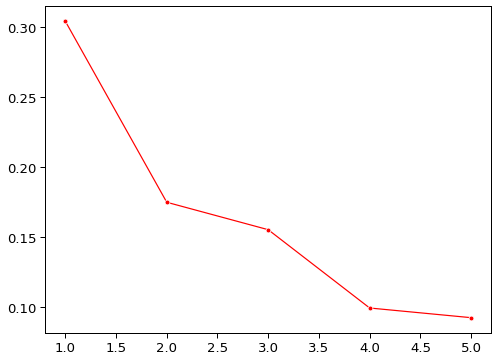

In [60]:
# scree plot
plt.figure(figsize = (8,6))
sns.lineplot(x = np.arange(pca.n_components_) + 1, y = pca.explained_variance_ratio_, marker = 'o', color = 'red')

- Let's now try to build a model on this data 

In [62]:
# SVM w/ Radial Basis Function
from sklearn.svm import SVC

clf_pca_svc_rbf = SVC(random_state=42, kernel='rbf')
clf_pca_svc_rbf.fit(pca_df, y_train)

SVC(random_state=42)

In [63]:
clf_pca_svc_rbf.score(pca_df, y_train)

0.7560775540641312

In [64]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

lda = LinearDiscriminantAnalysis()
lda = lda.fit(X=X_train_norm, y = y_train)
lda_data = lda.transform(X_train_norm)

In [65]:
lda.explained_variance_ratio_

array([1.])

[(-0.1, 0.4)]

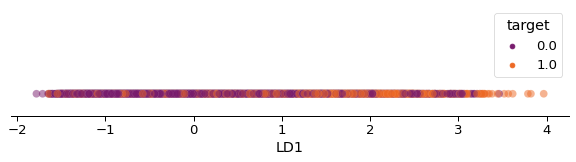

In [68]:
plt.figure(figsize=(10,2))
fig = sns.scatterplot(x = lda_data.reshape([13410]), y = np.zeros_like(lda_data.reshape([13410])), hue = y_train, 
                s = 60, palette = 'inferno', alpha = 0.5, linewidth = 0.1)
sns.despine(left = True)
fig.set(yticklabels=[], ylabel = None, xlabel = 'LD1')
fig.tick_params(left = False)
fig.set(ylim=(-0.1,0.4))

In [69]:
# SVM w/ Radial Basis Function
from sklearn.svm import SVC

clf_lda_svc_rbf = SVC(random_state=42, kernel='rbf')
clf_lda_svc_rbf.fit(lda_data, y_train)

SVC(random_state=42)

In [70]:
clf_lda_svc_rbf.score(lda_data, y_train)

0.7762117822520507

## 11. Using Improtant Features

- In Random Forests' Feature Importance Plot, we have al;ready seen that the two features - `city_development_index` and `log_training_hours` are the most important ones. We will try to analyse these features and see if any improvement in separability can be obtained.

In [58]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,target,log_training_hours
0,0.920,1,1,0,1,1,3,1,1.0,3.583519
1,0.776,1,0,0,1,1,4,2,0.0,3.850148
2,0.624,0,0,1,1,1,1,0,0.0,4.418841
3,0.789,0,0,0,1,0,4,0,1.0,3.951244
4,0.767,1,1,0,2,1,3,2,0.0,2.079442


In [76]:
df_reduced = df[['city_development_index', 'log_training_hours', 'target']]
df_reduced.head()

,city_development_index,log_training_hours,target
0,0.920,3.583519,1.0
1,0.776,3.850148,0.0
2,0.624,4.418841,0.0
3,0.789,3.951244,1.0
4,0.767,2.079442,0.0


In [77]:
# train test split
from sklearn.model_selection import train_test_split

X = df_reduced.drop('target', axis = 1)
y = df_reduced['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train =', X_train.shape)
print('X_test =', X_test.shape)
print('y_train =', y_train.shape)
print('y_test =', y_test.shape)

X_train = (13410, 2)
X_test = (5748, 2)
y_train = (13410,)
y_test = (5748,)


<AxesSubplot:xlabel='city_development_index', ylabel='log_training_hours'>

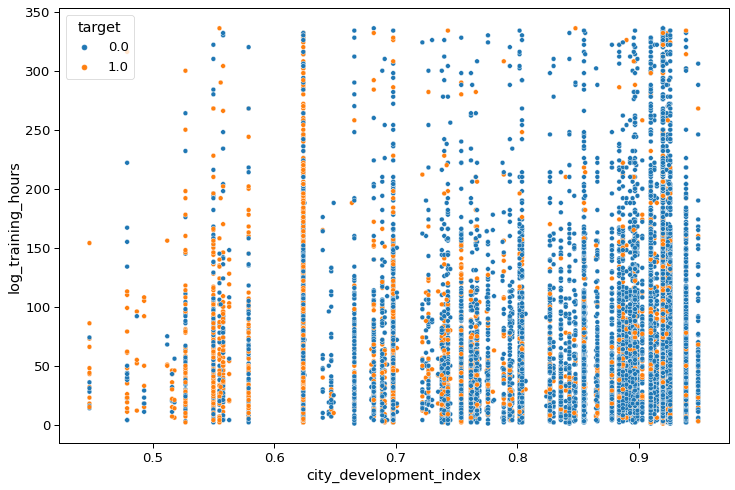

In [74]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = df['city_development_index'], y = np.exp(df['log_training_hours']), hue = df['target'])

In [78]:
# Niormalizing Data - MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

X_train_norm[:5]

array([[0.35129741, 0.63414285],
       [0.94211577, 0.66548514],
       [0.35129741, 0.84324928],
       [0.46706587, 0.65439054],
       [0.35129741, 0.72536137]])

In [80]:
# Poly SVM with different degrees
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = {'C' : [0.1, 1, 10],
          'kernel' : ['poly'],
          # 'degree' : [2, 3, 4, 5, 10]    # only used for poly kernel
         }

clf_svm_cv = GridSearchCV(estimator = SVC(random_state=42),
                                param_grid = params,
                                scoring = 'accuracy',
                                verbose = 3,
                                cv = 2
                               )

clf_svm_cv.fit(X_train_norm, y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2] END ................C=0.1, kernel=poly;, score=0.755 total time=  35.9s
[CV 2/2] END ................C=0.1, kernel=poly;, score=0.752 total time= 1.3min
[CV 1/2] END ..................C=1, kernel=poly;, score=0.754 total time= 2.0min
[CV 2/2] END ..................C=1, kernel=poly;, score=0.752 total time= 2.9min
[CV 1/2] END .................C=10, kernel=poly;, score=0.755 total time= 3.3min
[CV 2/2] END .................C=10, kernel=poly;, score=0.752 total time= 3.2min


GridSearchCV(cv=2, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['poly']},
             scoring='accuracy', verbose=3)

- `C` doesn't have much effect so we will use default value i.e. `C = 1`

In [ ]:
# Poly SVM with different degrees
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = {'kernel' : ['poly'],
          'degree' : [2, 3, 4, 5, 10]    # only used for poly kernel
         }

clf_svm_cv = GridSearchCV(estimator = SVC(random_state=42),
                                param_grid = params,
                                scoring = 'accuracy',
                                verbose = 3,
                                cv = 2
                               )

clf_svm_cv.fit(X_train_norm, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV 1/2] END .............degree=2, kernel=poly;, score=0.752 total time=  13.1s
[CV 2/2] END .............degree=2, kernel=poly;, score=0.752 total time=   6.5s
[CV 1/2] END .............degree=3, kernel=poly;, score=0.754 total time= 2.0min
[CV 2/2] END .............degree=3, kernel=poly;, score=0.752 total time= 2.8min
[CV 1/2] END .............degree=4, kernel=poly;, score=0.755 total time= 5.4min
[CV 2/2] END .............degree=4, kernel=poly;, score=0.754 total time= 5.3min
[CV 1/2] END .............degree=5, kernel=poly;, score=0.755 total time= 8.1min
[CV 2/2] END .............degree=5, kernel=poly;, score=0.754 total time= 5.0min
[CV 1/2] END ............degree=10, kernel=poly;, score=0.779 total time=47.6min
[CV 2/2] END ............degree=10, kernel=poly;, score=0.770 total time=24.7min


- As we can see, higher order SVM polynomial kernel is not improving the accuracy to any significant extent.
- Although, 10th order poly kernel did show an ~2.5-3 % improvement in the performance, the time it took to run those models is not worth it unless we are using a distributed system or GPUs.

# THE END